In [ ]:
from textblob import TextBlob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from collections import Counter
import time
# model.eval()

predictions = []
bert_times_recorded = []
negs = []
pos = []
neus = []
total_count = 0.0

initial_time = 0
total_batches = int(len(real_data)/1000)
for i in range(total_batches):
  batch = real_data[i:1000*(i+1)]
  batch_pred = []
  start_time = time.time()
  for line in batch:
    pred = TextBlob(line).sentiment.polarity
    if pred>0.3:
      batch_pred.append('positive')
    elif pred<-0.3:
      batch_pred.append('negative')
    else:
      batch_pred.append('neutral')
    # batch_pred.append(pred)
  # print(batch)
  end_time = time.time()
  total_count+=len(batch)
  # batch = tuple(t.to(device) for t in batch)
  
  # b_input_ids, b_input_mask = batch

  # with torch.no_grad():

  #     result = model(b_input_ids, 
  #                    token_type_ids=None, 
  #                    attention_mask=b_input_mask,
  #                    return_dict=True)

  # logits = result.logits
  # logits = logits.detach().cpu().numpy()

  initial_time+=(end_time-start_time)
  bert_times_recorded.append(initial_time)  
  # logits=list(np.argmax(logits,axis=1))
  # for i in range(len(logits)):
  # logits_ = []
  # for l in logits:
  #   if l==0:
  #     logits_.append('negative')
  #   elif l==1:
  #     logits_.append('neutral')
  #   else:
  #     logits_.append('postive')
  predictions+=(batch_pred)
  dict_ = dict(Counter(predictions))
  negs.append(float(dict_['negative'])/total_count)
  pos.append(float(dict_['positive'])/total_count)
  neus.append(float(dict_['neutral'])/total_count)
  # for key in dict_:
  #   dict_[key] = [dict_[key]]
  # print(dict_)
  # pd.DataFrame(dict_).to_csv('real_time_bert_pred.csv')
  # time.sleep(10)
    

print('    DONE.')

    DONE.


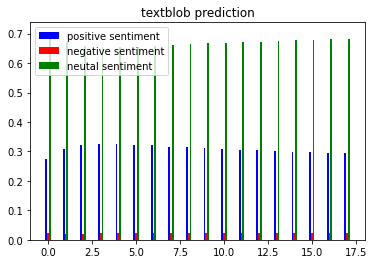

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(np.arange(len(pos))-0.1, pos, color='blue', width= 0.1,label = 'positive sentiment')
plt.bar(np.arange(len(negs)), negs, color='red', width=0.1, label = 'negative sentiment')
plt.bar(np.arange(len(neus))+0.1, neus, color='green', width= 0.1, label = 'neutal sentiment')
plt.legend()
plt.title('textblob prediction')
plt.show()

In [ ]:
import pandas as pd
pd.DataFrame({'time':bert_times_recorded}).to_csv("text_blob_time.csv", index=False)

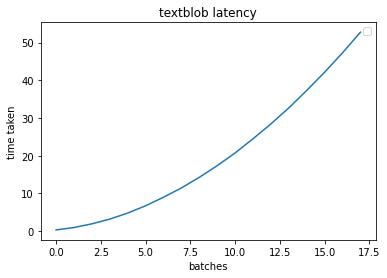

In [ ]:
plt.plot(np.arange(len(bert_times_recorded)), bert_times_recorded)
plt.xlabel("batches")
plt.ylabel("time taken")
plt.title("textblob latency")
plt.legend()
plt.show()

In [ ]:
bert = pd.read_csv("bert_latency.csv")
bert.head()

,time
0,6.699917
1,13.398239
2,20.186589
3,26.967507
4,33.818141


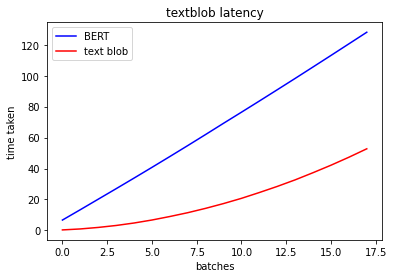

In [ ]:
bert = pd.read_csv("bert_latency.csv")
bert_ = bert['time'].tolist()
text_blob = bert_times_recorded
plt.plot(np.arange(len(bert_)), bert_, color='blue', label='BERT')
plt.plot(np.arange(len(text_blob)), text_blob, color='red', label = "text blob")
plt.xlabel("batches")
plt.ylabel("time taken")
plt.title("textblob latency")
plt.legend()
plt.show()